In [4]:
# Import stufff
from numpy.linalg import inv
from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pylab as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True

plt.rc('font', family='serif', weight='bold')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
# create datasets!
f = open('slurm-43057.out')
content = f.read()
content = content.split()
alph = ['']
for i in range(0, 241):
    if (len(content[i]) > 20):
        a = content[i]
        alph.append(a)
del alph[0]
#print(alph)
data = [alph[i:i+5] for i in range(0, len(alph), 5)]
#print(data)
pdata = np.zeros((24,5))
#print(pdata)
for i in range(0, 24):
    for k in range(0, 5):
       pdata[i,k] = np.float64(data[i][k])
#print(pdata)
pdata = np.array(pdata)
#print(pdata)
#print(np.size(pdata))
resolution = np.array([125, 250, 1000, 4000])
mpi_procs = np.array([1, 2, 5, 10, 20, 40])
#print(pdata[0:6,4])

[0.04884492 0.03713524 0.0288831  0.02805531 0.02933031 0.05272054]
[ 1  2  5 10 20 40]


/tmp/ipykernel_788/256904534.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65', linestyle='-')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


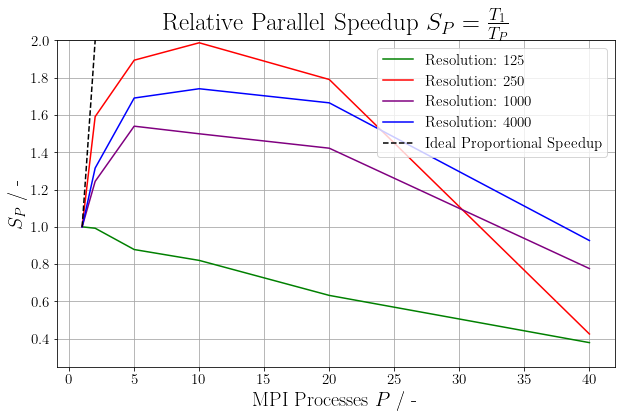

In [6]:
#plt.plot(mpi_procs,pdata)
#print(pdata[0:4][3])
#print(pdata[0:6,4])
print(pdata[18:24,4])
print(mpi_procs)

plt.plot(mpi_procs,pdata[0,4] / pdata[0:6,4], color='green', label="Resolution: 125")
plt.plot(mpi_procs,pdata[6,4] / pdata[6:12,4], color='red', label="Resolution: 250")
plt.plot(mpi_procs,pdata[12,4] / pdata[12:18,4], color='purple', label="Resolution: 1000")
plt.plot(mpi_procs,pdata[18,4] / pdata[18:24,4], color='blue', label="Resolution: 4000")
plt.plot(mpi_procs,mpi_procs, color='black', linestyle='dashed', label="Ideal Proportional Speedup")
plt.ylim(0.25,2)
plt.title(r'Relative Parallel Speedup $S_P=\frac{{T_1}}{{T_P}}$')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend()
plt.xlabel("MPI Processes $P$ / -")
plt.ylabel("$S_P$ / -")
plt.savefig('/home/tellocam/DIR/TU Wien/NSSC2/EX1/PDF_ex1_task2/figures/S_P_rel.eps', format='eps')
#/home/tellocam/projects/NSSC2/EX1/PDF_ex1_task2/figures/S_P_rel.eps
#NSSC2/EX1/PDF_ex1_task2/figures/S_P_rel.eps

/tmp/ipykernel_788/1404459697.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1)
/tmp/ipykernel_788/1404459697.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65', linestyle='-')


Text(0, 0.5, '$\\varepsilon$ / -')

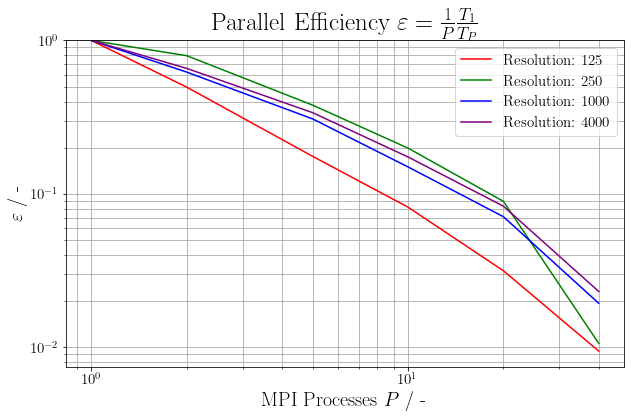

In [7]:
plt.loglog(mpi_procs,pdata[0,4] / (pdata[0:6,4]*mpi_procs), color='red', label="Resolution: 125")
plt.loglog(mpi_procs,pdata[6,4] / (pdata[6:12,4]*mpi_procs), color='green', label="Resolution: 250")
plt.loglog(mpi_procs,pdata[12,4] / (pdata[12:18,4]*mpi_procs), color='blue', label="Resolution: 1000")
plt.loglog(mpi_procs,pdata[18,4] / (pdata[18:24,4]*mpi_procs), color='purple', label="Resolution: 4000")
plt.ylim(0,1)
plt.title(r'Parallel Efficiency $\varepsilon=\frac{{1}}{{P}} \frac{{T_1}}{{T_P}}$')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend()
plt.xlabel("MPI Processes $P$ / -")
plt.ylabel(r'$\varepsilon$ / -')
#plt.savefig('/home/tellocam/DIR/TU Wien/NSSC2/EX1/PDF_ex1_task2/figures/epsilon_loglog.eps', format='eps')


/tmp/ipykernel_788/685822571.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1)
/tmp/ipykernel_788/685822571.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65', linestyle='-')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


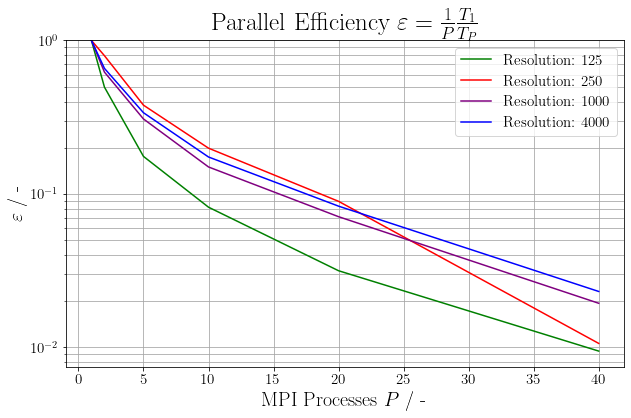

In [8]:
plt.semilogy(mpi_procs,pdata[0,4] / (pdata[0:6,4]*mpi_procs), color='green', label="Resolution: 125")
plt.semilogy(mpi_procs,pdata[6,4] / (pdata[6:12,4]*mpi_procs), color='red', label="Resolution: 250")
plt.semilogy(mpi_procs,pdata[12,4] / (pdata[12:18,4]*mpi_procs), color='purple', label="Resolution: 1000")
plt.semilogy(mpi_procs,pdata[18,4] / (pdata[18:24,4]*mpi_procs), color='blue', label="Resolution: 4000")
plt.ylim(0,1)
plt.title(r'Parallel Efficiency $\varepsilon=\frac{{1}}{{P}} \frac{{T_1}}{{T_P}}$')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend()
plt.xlabel("MPI Processes $P$ / -")
plt.ylabel(r'$\varepsilon$ / -')
plt.savefig('/home/tellocam/DIR/TU Wien/NSSC2/EX1/PDF_ex1_task2/figures/epsilon_semilogy.eps', format='eps')


/tmp/ipykernel_788/2317866575.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65', linestyle='-')


Text(0, 0.5, '$\\varepsilon$ / -')

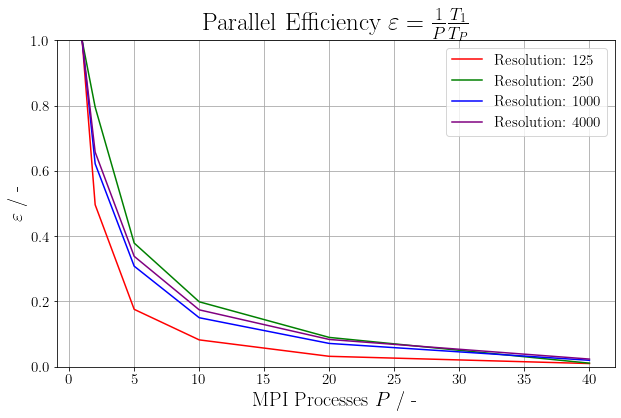

In [9]:
plt.plot(mpi_procs,pdata[0,4] / (pdata[0:6,4]*mpi_procs), color='red', label="Resolution: 125")
plt.plot(mpi_procs,pdata[6,4] / (pdata[6:12,4]*mpi_procs), color='green', label="Resolution: 250")
plt.plot(mpi_procs,pdata[12,4] / (pdata[12:18,4]*mpi_procs), color='blue', label="Resolution: 1000")
plt.plot(mpi_procs,pdata[18,4] / (pdata[18:24,4]*mpi_procs), color='purple', label="Resolution: 4000")
plt.ylim(0,1)
plt.title(r'Parallel Efficiency $\varepsilon=\frac{{1}}{{P}} \frac{{T_1}}{{T_P}}$')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend()
plt.xlabel("MPI Processes $P$ / -")
plt.ylabel(r'$\varepsilon$ / -')
#plt.savefig('/home/tellocam/DIR/TU Wien/NSSC2/EX1/PDF_ex1_task2/figures/epsilon_plot.eps', format='eps')

In [10]:

#fig, ax =plt.subplots()
#ax.plot(thread_count, rtime_static, "x-", label="schedule(static)")
#ax.plot(thread_count, rtime_static_1, "x-", label="schedule(static,1)")
#ax.plot(thread_count, rtime_dynamic, "x-", label="schedule(dynamic)")
#ax.set(xlabel="Thread count", ylabel="Runtime (s)")
#plt.xticks(thread_count)
#plt.legend()
#plt.grid()
#plt.show()